In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from PIL import Image

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/SE/fer2013.csv')

In [ ]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
df1=df.drop(['Usage'],axis=1)

In [ ]:
df1

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [ ]:
df1['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
dict={0:'Anger',1:'Disgust',2:'Fear',3:'Happiness',4:'Sadness',5:'Surprise',6:'Neutral'}

In [ ]:
a=df['emotion'].value_counts()
b=a.index.tolist()

In [ ]:
a

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
b

[3, 6, 4, 2, 0, 5, 1]

In [ ]:
c=[]
for i in range(len(b)):
  c.append(dict[b[i]])

In [ ]:
c

['Happiness', 'Neutral', 'Sadness', 'Fear', 'Anger', 'Surprise', 'Disgust']

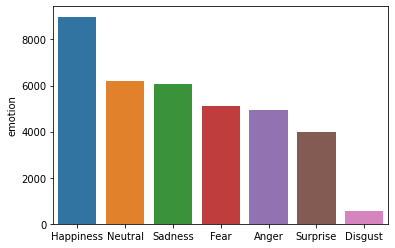

In [ ]:
sns.barplot(x=c,y=a)

In [ ]:
df1.shape

(35887, 2)

In [ ]:
INTERESTED_LABELS = [2,3,4,6]
df1 = df1[df1.emotion.isin(INTERESTED_LABELS)]

In [ ]:
df1['pixels'] = df1['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))
X = np.array(df1['pixels'].to_list())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)

In [ ]:
df=X_reshaped

In [ ]:
for i in range(26000):
  df[i]=df[i]/255

In [ ]:
df

array([[[[9.05882359e-01],
         [8.31372559e-01],
         [6.11764729e-01],
         ...,
         [1.72549024e-01],
         [1.05882354e-01],
         [6.27451017e-02]],

        [[8.98039222e-01],
         [6.86274529e-01],
         [5.80392182e-01],
         ...,
         [1.05882354e-01],
         [1.37254909e-01],
         [1.05882354e-01]],

        [[8.39215696e-01],
         [6.11764729e-01],
         [6.15686297e-01],
         ...,
         [1.09803922e-01],
         [8.62745121e-02],
         [1.09803922e-01]],

        ...,

        [[9.45098042e-01],
         [9.60784316e-01],
         [9.80392158e-01],
         ...,
         [2.23529413e-01],
         [3.96078438e-01],
         [5.72549045e-01]],

        [[9.64705884e-01],
         [9.80392158e-01],
         [9.88235295e-01],
         ...,
         [3.05882365e-01],
         [4.11764711e-01],
         [6.35294139e-01]],

        [[9.80392158e-01],
         [9.84313726e-01],
         [9.80392158e-01],
         ...,
 

In [ ]:
df.shape

(26385, 48, 48, 1)

In [ ]:
df[0].shape

(48, 48, 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(48,48,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()) 
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()) 
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 10, 10, 128)      512       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
df1=df1['emotion']

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
df1

2        2
3        4
4        6
5        2
6        4
        ..
35880    2
35882    6
35883    3
35885    3
35886    2
Name: emotion, Length: 26385, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
df1=lb.fit_transform(df1)

In [ ]:
df1

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df1, test_size=0.2, random_state=42)

In [ ]:
n_epochs = 40
batch_size = 64
history = model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
                           epochs=n_epochs, 
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/40
106/106 [==============================] - 27s 220ms/step - loss: 1.4636 - accuracy: 0.3311 - val_loss: 4.6111 - val_accuracy: 0.2030 - lr: 0.0010
Epoch 2/40
106/106 [==============================] - 13s 127ms/step - loss: 1.4232 - accuracy: 0.3365 - val_loss: 1.9350 - val_accuracy: 0.3479 - lr: 0.0010
Epoch 3/40
106/106 [==============================] - 13s 127ms/step - loss: 1.3757 - accuracy: 0.3438 - val_loss: 2.0351 - val_accuracy: 0.2266 - lr: 0.0010
Epoch 4/40
106/106 [==============================] - 14s 127ms/step - loss: 1.3542 - accuracy: 0.3499 - val_loss: 1.7007 - val_accuracy: 0.2333 - lr: 0.0010
Epoch 5/40
106/106 [==============================] - 13s 126ms/step - loss: 1.3468 - accuracy: 0.3544 - val_loss: 2.6693 - val_accuracy: 0.2325 - lr: 0.0010
Epoch 6/40
106/106 [==============================] - 13s 126ms/step - loss: 1.3380 - accuracy: 0.3632 - val_loss: 1.5652 - val_accuracy: 0.2115 - lr: 0.0010
Epoch 7/40
106/106 [==============================] 

In [ ]:
model.save('model4.h5')

In [ ]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

2725 [[5.3390284e-08 9.9999702e-01 3.1080209e-08 2.9996518e-06]]   [0 0 1 0]
Happiness


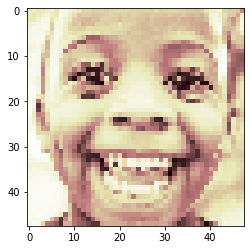

In [ ]:
i=np.random.randint(4000)
img = np.array(image.load_img("/content/gdrive/MyDrive/SE/378ffa7b4bc07f190ee35f85ed816377.jpg",target_size=(48,48)))
img=np.array(tf.image.rgb_to_grayscale(img, name=None))/255
img = img.reshape(1, 48, 48, 1)
dict={0:'Fear',1:'Happiness',2:'Sadness',3:'Neutral'}
#a=model.predict(X_test[i].reshape(1,48,48,1))
plt.imshow(img.reshape(48,48),cmap='pink')
a=model.predict(img)
print(i,a," ",y_test[i])
print(dict[np.argmax(a)])

Predicted: Sadness  Actual: Happiness


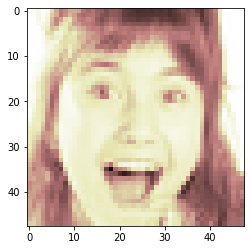

In [ ]:
print("Predicted:",dict[np.argmax(a)]," Actual:",dict[np.argmax(y_test[i])])
plt.imshow(X_test[i].reshape(48,48),cmap='pink')

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(5, activation='softmax'))

NameError: ignored